GOAL: Create a model based on overall team stats retrieve insights about important of a teams offense and defense in a teams success in the regular season. 

In [77]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.model_selection as skms
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
Team_Stats = pd.read_csv(r'C:\Users\harme\NBA_Team_Stats.csv')

In [21]:
pd.set_option('display.max_columns', None)
Team_Stats

,Team_Rank,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Year,Abb,Opponent_PTS
0,1,Golden State Warriors,82,73,9,0.890,48.5,114.9,42.5,87.3,48.7,13.1,31.6,41.6,16.7,21.8,76.3,10.0,36.2,46.2,28.9,15.2,8.4,6.1,4.1,20.7,19.8,10.8,2015,GSW,104.1
1,2,San Antonio Spurs,82,67,15,0.817,48.1,103.5,40.1,82.9,48.4,7.0,18.5,37.5,16.4,20.4,80.3,9.4,34.5,43.9,24.5,13.1,8.3,5.9,3.9,17.5,19.5,10.6,2015,SAS,92.9
2,3,Cleveland Cavaliers,82,57,25,0.695,48.4,104.3,38.7,84.0,46.0,10.7,29.6,36.2,16.3,21.7,74.8,10.6,33.9,44.5,22.7,13.6,6.7,3.9,4.4,20.3,20.6,6.0,2015,CLE,98.3
3,4,Toronto Raptors,82,56,26,0.683,48.2,102.7,36.7,81.3,45.1,8.6,23.4,37.0,20.8,26.7,77.7,10.2,33.2,43.4,18.7,13.1,7.8,5.5,5.4,19.6,22.0,4.5,2015,TOR,98.2
4,5,Oklahoma City Thunder,82,55,27,0.671,48.4,110.2,41.1,86.4,47.6,8.3,23.7,34.9,19.7,25.2,78.2,13.1,35.6,48.6,23.0,15.9,7.4,5.9,4.5,20.6,20.2,7.3,2015,OKC,102.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,26,Philadelphia 76ers,82,24,58,0.293,48.3,109.6,39.7,87.4,45.4,12.7,37.2,34.1,17.5,22.5,78.0,10.4,29.4,39.8,23.2,13.6,9.2,4.5,5.1,19.0,18.7,-6.2,2024,PHI,115.8
296,27,New Orleans Pelicans,82,21,61,0.256,48.2,109.8,40.6,89.9,45.2,12.0,34.6,34.7,16.5,21.9,75.4,12.1,31.5,43.6,25.8,14.6,8.5,5.2,5.2,18.3,17.9,-9.4,2024,NOP,119.2
297,28,Charlotte Hornets,82,19,63,0.232,48.2,105.1,38.3,89.1,43.0,13.0,38.3,33.9,15.5,19.8,78.3,12.2,33.0,45.2,24.3,15.5,7.4,4.5,5.3,18.7,18.1,-9.1,2024,CHA,114.2
298,29,Washington Wizards,82,18,64,0.220,48.1,108.0,39.4,89.9,43.9,13.1,39.1,33.5,16.0,20.6,77.8,10.6,33.1,43.7,25.1,15.6,7.6,5.1,5.2,19.7,18.2,-12.4,2024,WAS,120.4


It does seem important to also include opponent points per game, this can be achieve by getting a teams total point and subtracting the average point differential

In [22]:
Team_Stats['Opponent_PTS'] = Team_Stats['PTS']-Team_Stats['+/-']
Team_Stats

,Team_Rank,Team,GP,W,L,WIN%,Min,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,Year,Abb,Opponent_PTS
0,1,Golden State Warriors,82,73,9,0.890,48.5,114.9,42.5,87.3,48.7,13.1,31.6,41.6,16.7,21.8,76.3,10.0,36.2,46.2,28.9,15.2,8.4,6.1,4.1,20.7,19.8,10.8,2015,GSW,104.1
1,2,San Antonio Spurs,82,67,15,0.817,48.1,103.5,40.1,82.9,48.4,7.0,18.5,37.5,16.4,20.4,80.3,9.4,34.5,43.9,24.5,13.1,8.3,5.9,3.9,17.5,19.5,10.6,2015,SAS,92.9
2,3,Cleveland Cavaliers,82,57,25,0.695,48.4,104.3,38.7,84.0,46.0,10.7,29.6,36.2,16.3,21.7,74.8,10.6,33.9,44.5,22.7,13.6,6.7,3.9,4.4,20.3,20.6,6.0,2015,CLE,98.3
3,4,Toronto Raptors,82,56,26,0.683,48.2,102.7,36.7,81.3,45.1,8.6,23.4,37.0,20.8,26.7,77.7,10.2,33.2,43.4,18.7,13.1,7.8,5.5,5.4,19.6,22.0,4.5,2015,TOR,98.2
4,5,Oklahoma City Thunder,82,55,27,0.671,48.4,110.2,41.1,86.4,47.6,8.3,23.7,34.9,19.7,25.2,78.2,13.1,35.6,48.6,23.0,15.9,7.4,5.9,4.5,20.6,20.2,7.3,2015,OKC,102.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,26,Philadelphia 76ers,82,24,58,0.293,48.3,109.6,39.7,87.4,45.4,12.7,37.2,34.1,17.5,22.5,78.0,10.4,29.4,39.8,23.2,13.6,9.2,4.5,5.1,19.0,18.7,-6.2,2024,PHI,115.8
296,27,New Orleans Pelicans,82,21,61,0.256,48.2,109.8,40.6,89.9,45.2,12.0,34.6,34.7,16.5,21.9,75.4,12.1,31.5,43.6,25.8,14.6,8.5,5.2,5.2,18.3,17.9,-9.4,2024,NOP,119.2
297,28,Charlotte Hornets,82,19,63,0.232,48.2,105.1,38.3,89.1,43.0,13.0,38.3,33.9,15.5,19.8,78.3,12.2,33.0,45.2,24.3,15.5,7.4,4.5,5.3,18.7,18.1,-9.1,2024,CHA,114.2
298,29,Washington Wizards,82,18,64,0.220,48.1,108.0,39.4,89.9,43.9,13.1,39.1,33.5,16.0,20.6,77.8,10.6,33.1,43.7,25.1,15.6,7.6,5.1,5.2,19.7,18.2,-12.4,2024,WAS,120.4


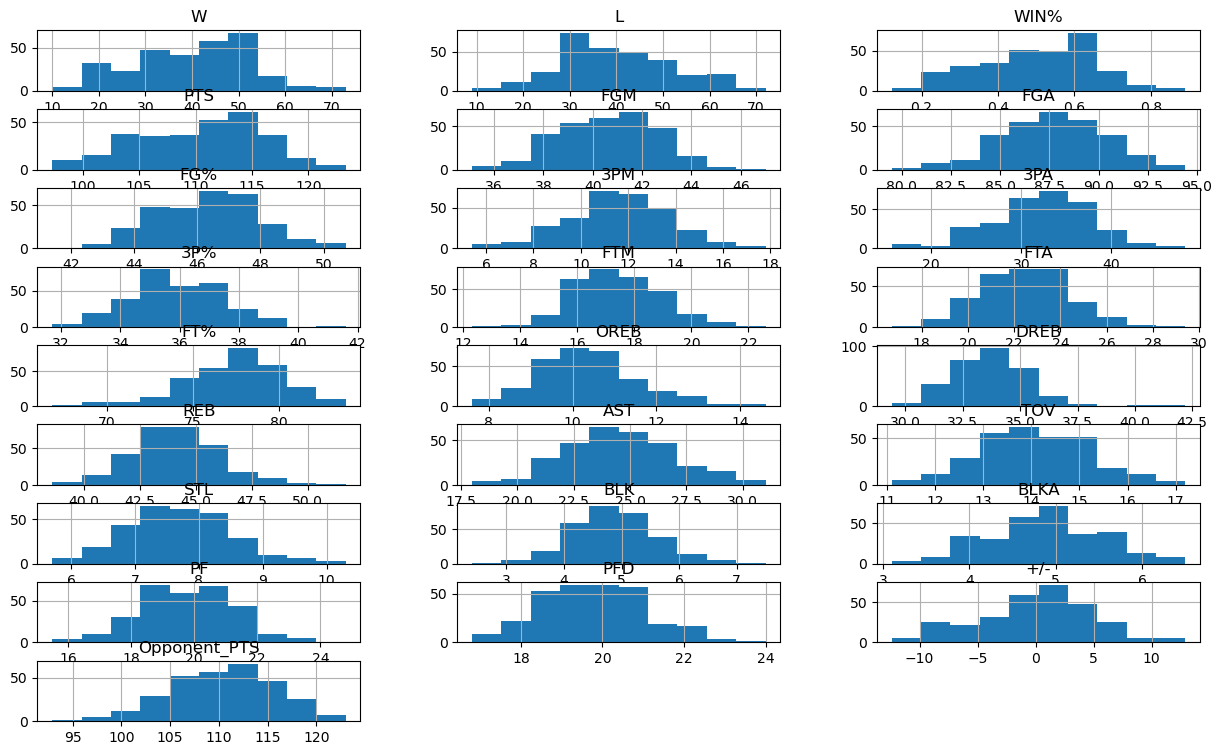

        Team_Rank          GP          W           L        WIN%         Min  \
count  300.000000  300.000000  300.00000  300.000000  300.000000  300.000000   
mean    15.136667   79.860000   39.93000   39.930000    0.499477   48.307667   
std      8.754434    4.421792   12.03889   11.836897    0.146847    0.157874   
min      1.000000   64.000000   10.00000    9.000000    0.122000   48.000000   
25%      7.000000   82.000000   32.00000   32.000000    0.402000   48.200000   
50%     15.000000   82.000000   42.00000   39.000000    0.512000   48.300000   
75%     23.000000   82.000000   48.00000   48.000000    0.604750   48.400000   
max     30.000000   82.000000   73.00000   72.000000    0.890000   48.800000   

              PTS         FGM         FGA         FG%         3PM         3PA  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   110.290333   40.647333   87.703667   46.343333   11.606000   32.290667   
std      5.464082    1.983467    2.6

In [23]:
Excluded = ['GP', 'Team_Rank', 'Year', 'Min']
Histrogram_df = Team_Stats.drop(columns=Excluded)
Histrogram_df.hist(figsize=(15,10), layout=(10,3))
plt.show()
print(Team_Stats.describe())

Looking at the histograms we can see most stats have a normal distribution (bell shape), with slight skews. However wins, loses, win%, PTS, and Opponent PTS, have more significant skews.
Looking at the details about each stat, it seem most discrepancies seems to be due to rounding errors (See win percentage mean). However looking at some mean vs medians there seem to be offensives that seem to slightly pull down the mean (see PTS and Offensive Rebounds), while for defense the mean and median are almost identical. 
Looking at Q1 and Q3 for each stat it seems that they are roughly similar distances from each other, except for PTS, and Rebounds, would be worth while to plot both groups with respect to Win% to see if any trends emerge before checking correlation.

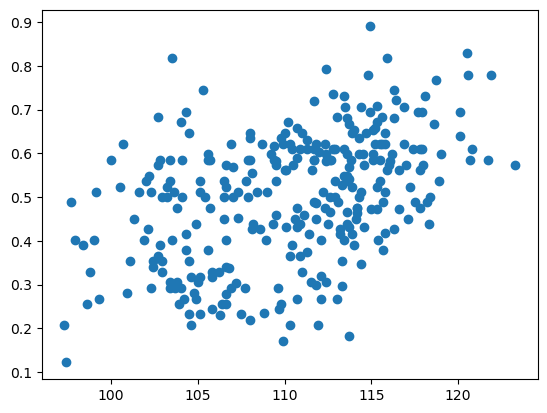

In [29]:
plt.scatter(x = Team_Stats['PTS'], y= Team_Stats['WIN%'])

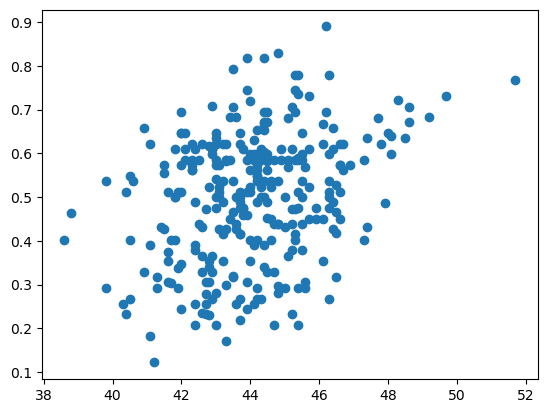

In [30]:
plt.scatter(x = Team_Stats['REB'], y= Team_Stats['WIN%'])

There does not seem to be any noticable patterns besides a slight upward direction, but nothing strong. 

In [32]:
Team_Stats_Numerized = Team_Stats.copy()
for col_name in Team_Stats_Numerized.columns:
    if(Team_Stats_Numerized[col_name].dtype =='object'):
        Team_Stats_Numerized[col_name] = Team_Stats_Numerized[col_name].astype('category')
        Team_Stats_Numerized[col_name] = Team_Stats_Numerized[col_name].cat.codes

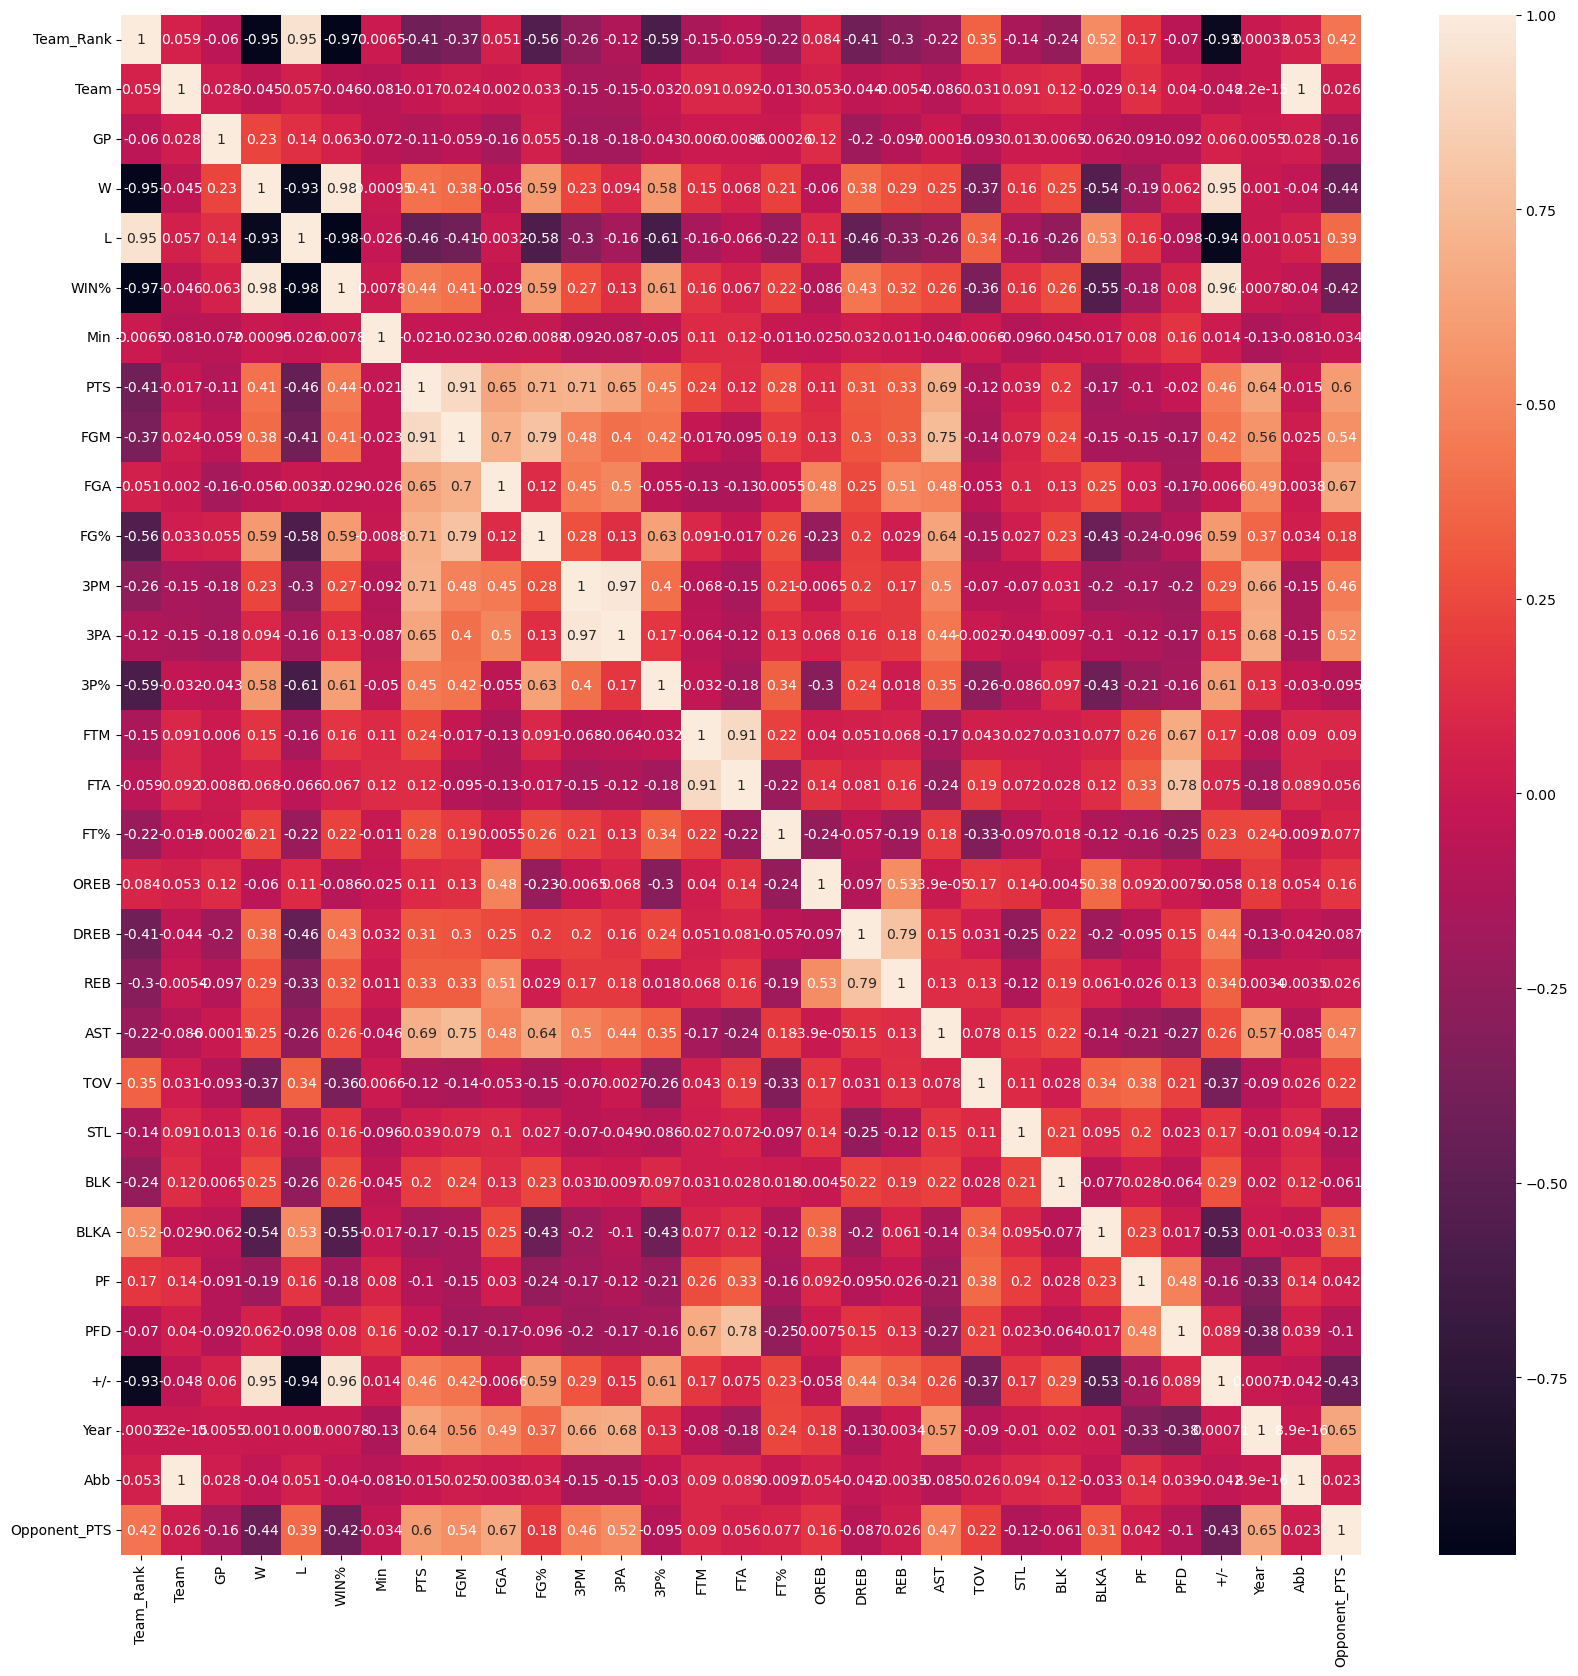

In [33]:
correlation_matrix = Team_Stats_Numerized.corr(method = 'pearson', numeric_only = True)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

We can pick up on certain trends that appear such as FG% and 3P% correlating more with Wins than points, and that dispite earlier expectations it seems teams were not very meaning full as a whole over the past 10 years with little correlation. However we do want to retrieve stats that would be significant in a model

In [34]:
data = []
for col in Team_Stats_Numerized:
    n ,p = scipy.stats.pearsonr(x =Team_Stats_Numerized['WIN%'],y = Team_Stats_Numerized[col])
    if col == 'WIN%':
        print('This is original column')

    elif p <.1:
        print(col, 'is statistically significant p=', p, 'has a correlation of', n)
        significance = 'yes'
        data.append([n, p, 'WIN%', col, significance])
    else:
        print(col, 'is NOT statistically signifciant p=', p, 'has a correlation of', n)
        significance = 'no'
        data.append([n, p, 'WIN%', col, significance])

Team_Win_Percent_Corr_P = pd.DataFrame(data, columns = ['correlation', 'p-value', 'value1', 'value2', 'significant'])

Team_Rank is statistically significant p= 1.3475828660206484e-186 has a correlation of -0.9707043517961633
Team is NOT statistically signifciant p= 0.4265875380896397 has a correlation of -0.04606987257743013
GP is NOT statistically signifciant p= 0.28021128232541925 has a correlation of 0.06254491760472145
W is statistically significant p= 2.7182830567972734e-226 has a correlation of 0.9842435434248598
L is statistically significant p= 5.901987639001464e-204 has a correlation of -0.977675076833445
This is original column
Min is NOT statistically signifciant p= 0.8929075262665169 has a correlation of 0.007805105337049836
PTS is statistically significant p= 6.530611753335751e-16 has a correlation of 0.4438355466255575
FGM is statistically significant p= 2.346968565028404e-13 has a correlation of 0.4063497422055469
FGA is NOT statistically signifciant p= 0.6171390113286555 has a correlation of -0.028977179871305637
FG% is statistically significant p= 5.841291990769137e-30 has a correlati

In [35]:
Team_Win_Percent_Corr_P[Team_Win_Percent_Corr_P['significant'] =='yes']

,correlation,p-value,value1,value2,significant
0,-0.970704,1.347583e-186,WIN%,Team_Rank,yes
3,0.984244,2.718283e-226,WIN%,W,yes
4,-0.977675,5.901988e-204,WIN%,L,yes
6,0.443836,6.530612e-16,WIN%,PTS,yes
7,0.406350,2.346969e-13,WIN%,FGM,yes
9,0.593688,5.841292e-30,WIN%,FG%,yes
10,0.269477,2.180965e-06,WIN%,3PM,yes
11,0.127547,2.717617e-02,WIN%,3PA,yes
12,0.610265,5.357325e-32,WIN%,3P%,yes
13,0.158567,5.915543e-03,WIN%,FTM,yes


Looking at value that are statistically significant, we see that, besides the Team Rank and their Wins and Loses, almost all team stats correlation regardless of correlation is statistically significant with the exception of Offensive rebounds and attempted shots except for 3 pointers attempted. 

For the model, a teams Rank in the league along with their wins and loses wouldn't be included for reason of that is what is trying to be predicted through the Win%. 

In [103]:
#First we need a training and test dataset we will go for a 80-20 split
train, test = skms.train_test_split(Team_Stats_Numerized, test_size = .2)
print(len(train))
print(len(test))

240
60


In [104]:
Win_Percent_Predictors = ['PTS','FGM','FG%','3PM','3PA','FTM','FT%','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','+/-','Opponent_PTS']

In [105]:
Predictors_train = train[Win_Percent_Predictors]
Predictors_test = test[Win_Percent_Predictors]
Win_train = train['WIN%'].copy()
Win_test = test['WIN%'].copy()

In [106]:
Win_model = LinearRegression()
Win_model.fit(Predictors_train, Win_train)

LinearRegression()

In [107]:
Win_test_prediction = Win_model.predict(Predictors_test)

In [110]:
type(Win_test)

pandas.core.series.Series

In [111]:
Win_test = Win_test.reset_index(drop=True)
Win_test

0     0.707
1     0.451
2     0.500
3     0.598
4     0.512
      ...  
55    0.297
56    0.402
57    0.341
58    0.708
59    0.512
Name: WIN%, Length: 60, dtype: float64

In [112]:
Win_test_prediction = pd.Series(Win_test_prediction)

<Axes: xlabel='rownumber'>

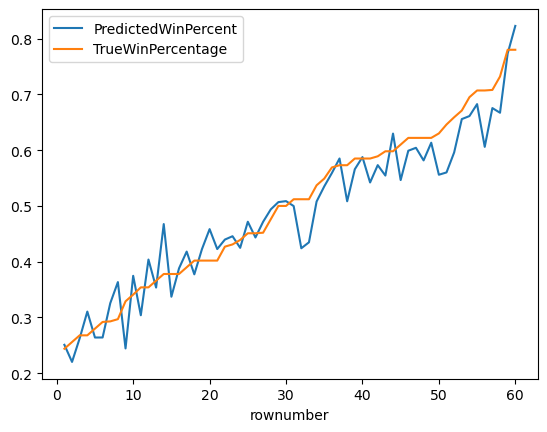

In [126]:
PredictionVsTrue = pd.concat([Win_test_prediction, Win_test], axis = 1)
PredictionVsTrue.columns = ['PredictedWinPercent', 'TrueWinPercentage']
plotWinPercent = PredictionVsTrue.sort_values(by = 'TrueWinPercentage')
n=1
rownumber = []
for row in plotWinPercent.iterrows():
    rownumber.append(n)
    n=n+1
plotWinPercent['rownumber'] = rownumber
plotWinPercent.plot(x = 'rownumber', y = ['PredictedWinPercent', 'TrueWinPercentage'])

The overall trend is followed by the model with a couple percent difference on average however this can be seen below

In [71]:
r2 = r2_score(Win_test, Win_test_prediction)
r2

0.911251016537671

In [73]:
mean_squared =mean_squared_error(Win_test, Win_test_prediction)
mean_squared

0.0014594855134964185

In [75]:
RootMeanSquared = mean_squared**.5
RootMeanSquared

0.038203213392284406

In [76]:
RootMeanSquared*82

3.132663498167321

The model seems to be effective when it comes to predictions with around 91% of the variance in the training data, the root mean square and mean square are also fairly low with the model being off of the true win percentage by around 3.8% or around 3.1 wins on average

In [80]:
VIF = pd.DataFrame()
VIF['variables'] = Predictors_train.columns
VIF['VIF'] = [variance_inflation_factor(Predictors_train, i) for i in range(Predictors_train.shape[1])]

C:\Users\harme\miniconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [81]:
VIF

,variables,VIF
0,PTS,inf
1,FGM,1.114076e+06
2,FG%,3.814881e+03
3,3PM,2.402662e+04
4,3PA,1.339841e+03
5,FTM,5.177400e+04
6,FT%,9.172694e+02
7,DREB,1.661538e+03
8,REB,2.315176e+03
9,AST,3.787588e+02


The VIF value are too high variable need to be removed to lower impacts of certain variables
Will remove PTS and Opponent_PTS as that information would interact most with FG numbers along with plus/minus

In [135]:
Win_Percent_Predictors = ['FGM','FG%','3PM','3PA','FTM','FT%','DREB','REB','AST','TOV','STL','BLK','BLKA','PF','+/-']
Predictors_train = train[Win_Percent_Predictors]
Predictors_test = test[Win_Percent_Predictors]

In [136]:
Win_model = LinearRegression()
Win_model.fit(Predictors_train, Win_train)

LinearRegression()

<Axes: xlabel='rownumber'>

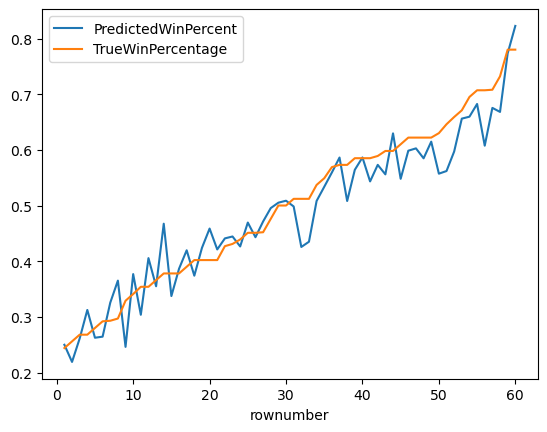

In [137]:
Win_test_prediction = Win_model.predict(Predictors_test)
Win_test_prediction = pd.Series(Win_test_prediction)
PredictionVsTrue = pd.concat([Win_test_prediction, Win_test], axis = 1)
PredictionVsTrue.columns = ['PredictedWinPercent', 'TrueWinPercentage']
plotWinPercent = PredictionVsTrue.sort_values(by = 'TrueWinPercentage')
n=1
rownumber = []
for row in plotWinPercent.iterrows():
    rownumber.append(n)
    n=n+1
plotWinPercent['rownumber'] = rownumber
plotWinPercent.plot(x = 'rownumber', y = ['PredictedWinPercent', 'TrueWinPercentage'])

Seems to be almost the same as the previous model.

In [138]:
r2 = r2_score(Win_test, Win_test_prediction)
print(r2)
mean_squared =mean_squared_error(Win_test, Win_test_prediction)
print(mean_squared)
RootMeanSquared = mean_squared**.5
print(RootMeanSquared)
RootMeanSquared*82

0.9147554538339269
0.0017765318369828253
0.042148924505648125


3.4562118094631464

Model seems to have slightly declined with the removal of pts, and opponent_pts.

In [139]:
VIF = pd.DataFrame()
VIF['variables'] = Predictors_train.columns
VIF['VIF'] = [variance_inflation_factor(Predictors_train, i) for i in range(Predictors_train.shape[1])]
VIF

,variables,VIF
0,FGM,3472.739628
1,FG%,3532.623295
2,3PM,1267.079889
3,3PA,1298.992065
4,FTM,207.695653
5,FT%,888.078845
6,DREB,1603.482150
7,REB,2302.664359
8,AST,381.250469
9,TOV,390.295798


VIF is still too high for all variables except plus/minus, will remove FGM, 3PA, and DREB as those have the highest VIF while also keeping some variable to act as a monitor for certain aspect of basketball, like 2 pointers and 3 pointers.

In [143]:
Win_Percent_Predictors = ['FG%','3PM','FTM','FT%','REB','AST','TOV','STL','BLK','BLKA','PF','+/-']
Predictors_train = train[Win_Percent_Predictors]
Predictors_test = test[Win_Percent_Predictors]

<Axes: xlabel='rownumber'>

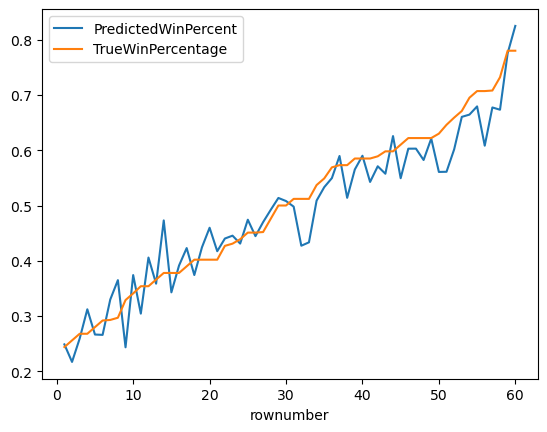

In [144]:
Win_model = LinearRegression()
Win_model.fit(Predictors_train, Win_train)
Win_test_prediction = Win_model.predict(Predictors_test)
Win_test_prediction = pd.Series(Win_test_prediction)
PredictionVsTrue = pd.concat([Win_test_prediction, Win_test], axis = 1)
PredictionVsTrue.columns = ['PredictedWinPercent', 'TrueWinPercentage']
plotWinPercent = PredictionVsTrue.sort_values(by = 'TrueWinPercentage')
n=1
rownumber = []
for row in plotWinPercent.iterrows():
    rownumber.append(n)
    n=n+1
plotWinPercent['rownumber'] = rownumber
plotWinPercent.plot(x = 'rownumber', y = ['PredictedWinPercent', 'TrueWinPercentage'])

In [145]:
r2 = r2_score(Win_test, Win_test_prediction)
print(r2)
mean_squared =mean_squared_error(Win_test, Win_test_prediction)
print(mean_squared)
RootMeanSquared = mean_squared**.5
print(RootMeanSquared)
RootMeanSquared*82

0.9158259207686016
0.0017542228603336673
0.04188344374969264


3.4344423874747965

Similar result to prevopis model, model does not seem to be missing by much still, this is the final iterition of this model however below will be a model based on team statistics that uses 3 offensive stats and 3 defensive to test the strength of basic stats

In [146]:
VIF = pd.DataFrame()
VIF['variables'] = Predictors_train.columns
VIF['VIF'] = [variance_inflation_factor(Predictors_train, i) for i in range(Predictors_train.shape[1])]
VIF

,variables,VIF
0,FG%,1340.024320
1,3PM,52.742881
2,FTM,199.463632
3,FT%,774.465656
4,REB,551.860543
5,AST,256.076097
6,TOV,255.196446
7,STL,118.388010
8,BLK,60.793695
9,BLKA,114.104126


In [153]:
Win_Percent_Predictors = ['FG%','3P%', 'FT%', 'REB', 'STL', 'BLK']
Predictors_train = train[Win_Percent_Predictors]
Predictors_test = test[Win_Percent_Predictors]

<Axes: xlabel='rownumber'>

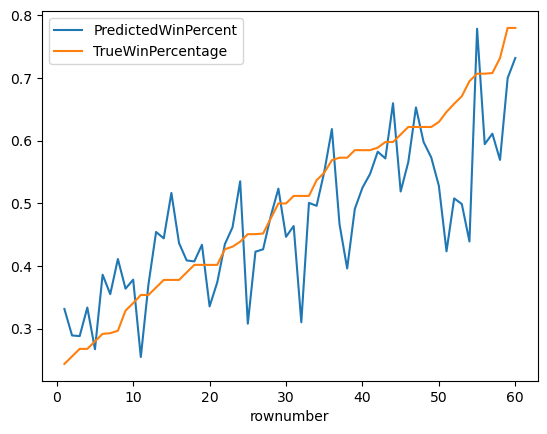

In [154]:
Win_model = LinearRegression()
Win_model.fit(Predictors_train, Win_train)
Win_test_prediction = Win_model.predict(Predictors_test)
Win_test_prediction = pd.Series(Win_test_prediction)
PredictionVsTrue = pd.concat([Win_test_prediction, Win_test], axis = 1)
PredictionVsTrue.columns = ['PredictedWinPercent', 'TrueWinPercentage']
plotWinPercent = PredictionVsTrue.sort_values(by = 'TrueWinPercentage')
n=1
rownumber = []
for row in plotWinPercent.iterrows():
    rownumber.append(n)
    n=n+1
plotWinPercent['rownumber'] = rownumber
plotWinPercent.plot(x = 'rownumber', y = ['PredictedWinPercent', 'TrueWinPercentage'])

In [155]:
r2 = r2_score(Win_test, Win_test_prediction)
print(r2)
mean_squared =mean_squared_error(Win_test, Win_test_prediction)
print(mean_squared)
RootMeanSquared = mean_squared**.5
print(RootMeanSquared)
RootMeanSquared*82

0.6061327648965777
0.008208357181495714
0.09059998444533925


7.429198724517819

It seems this bare bone stats were not effective, it seems that some indicator looking at team preformance compared to the other team has a strong affect on the model. Overall of the 4 models the first one seems to be the most effictive with the 3rd being the prefered pick due to a significantly lower VIF value, lowering the chance that the model is unstable. 